<a href="https://colab.research.google.com/github/MALEKA-SKHUMBUSO/Titanic/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Mounting my Colap to my drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#uploading local files with datasets

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving gender_submission.csv to gender_submission.csv


In [ ]:
# Reading in my datasets

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Data Processing

In [ ]:
# Checking train data head
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Checking test data head
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Vadility check
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Vadility check
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Display summary statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Display summary statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


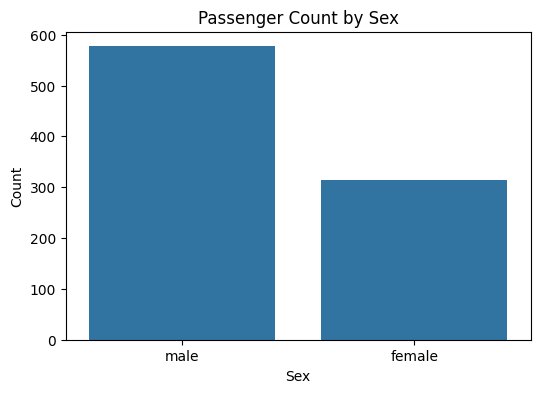

In [ ]:
# Plotting the count of passengers by sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train_data)
plt.title('Passenger Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

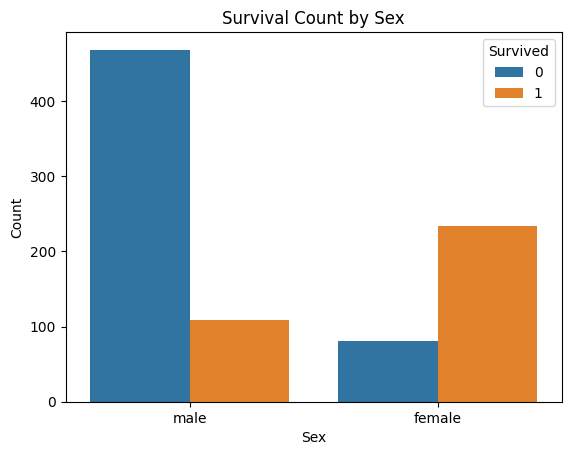

In [ ]:
# Bar plot of Survival count by Sex
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.show()

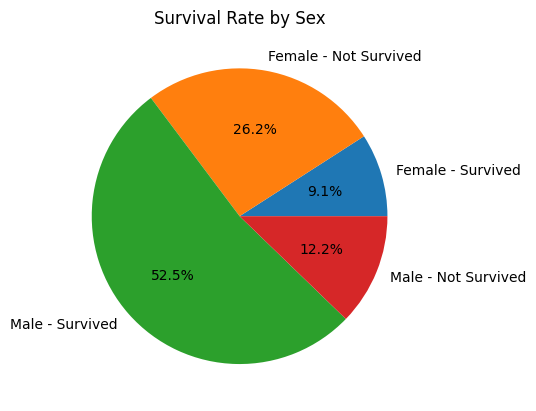

In [ ]:
# Pie chart to visualize Sex and Survived

survived_sex = train_data.groupby(['Sex', 'Survived'])['PassengerId'].count()
labels = ['Female - Survived', 'Female - Not Survived', 'Male - Survived', 'Male - Not Survived']

plt.pie(survived_sex, labels=labels, autopct='%1.1f%%')
plt.title('Survival Rate by Sex')
plt.show()

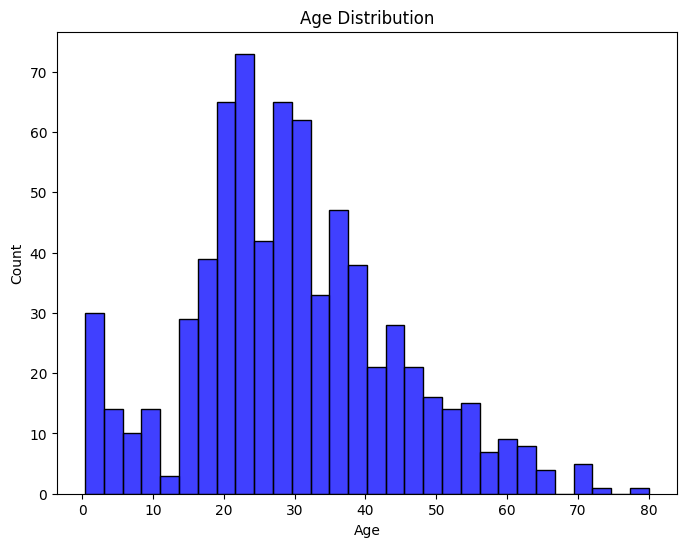

In [ ]:
# Histogram plot of age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=False, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

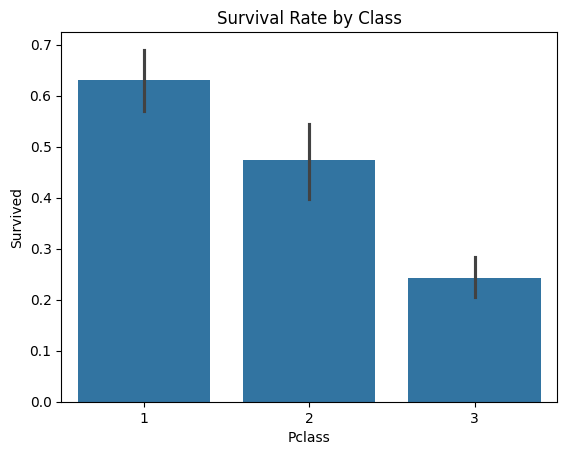

In [ ]:
# Barplot of Survival rate by class
sns.barplot(x='Pclass',y='Survived', data=train_data)
plt.title('Survival Rate by Class')
plt.show()

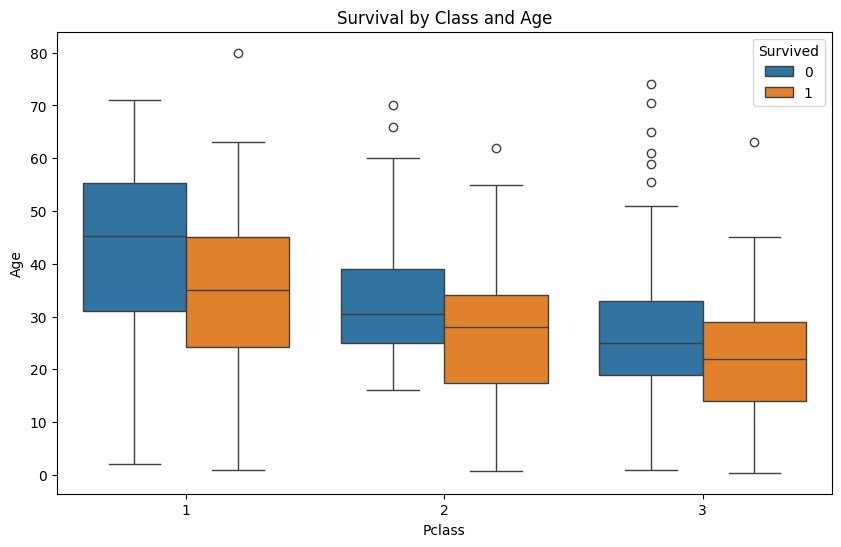

In [ ]:
# Boxplot of survival by Pclass and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_data)
plt.title('Survival by Class and Age')
plt.show()

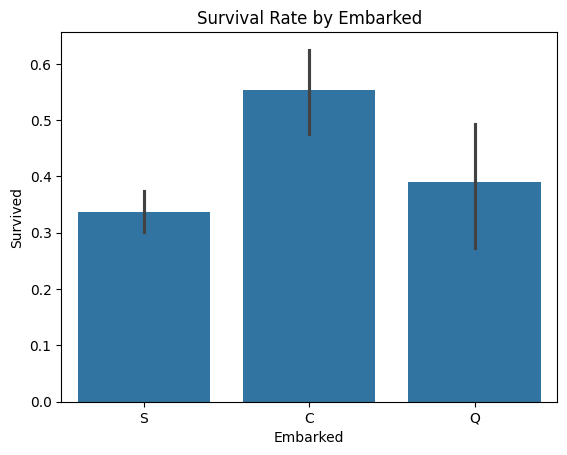

In [ ]:
# Barplot of SUrvival rate by Embarked
sns.barplot(x='Embarked',y='Survived', data=train_data)
plt.title('Survival Rate by Embarked')
plt.show()

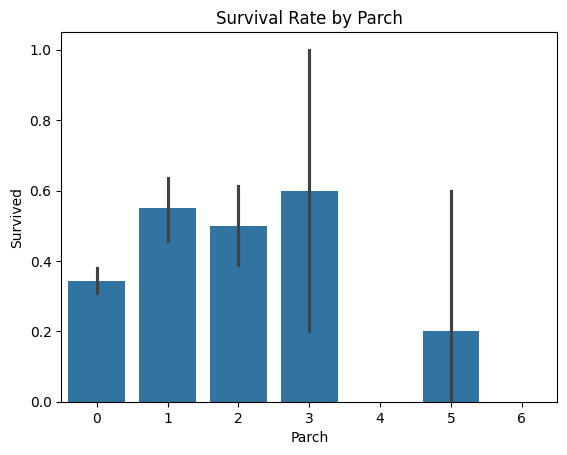

In [ ]:
# Barplot of Survival rate by Parch
sns.barplot(x='Parch',y='Survived', data=train_data)
plt.title('Survival Rate by Parch')
plt.show()

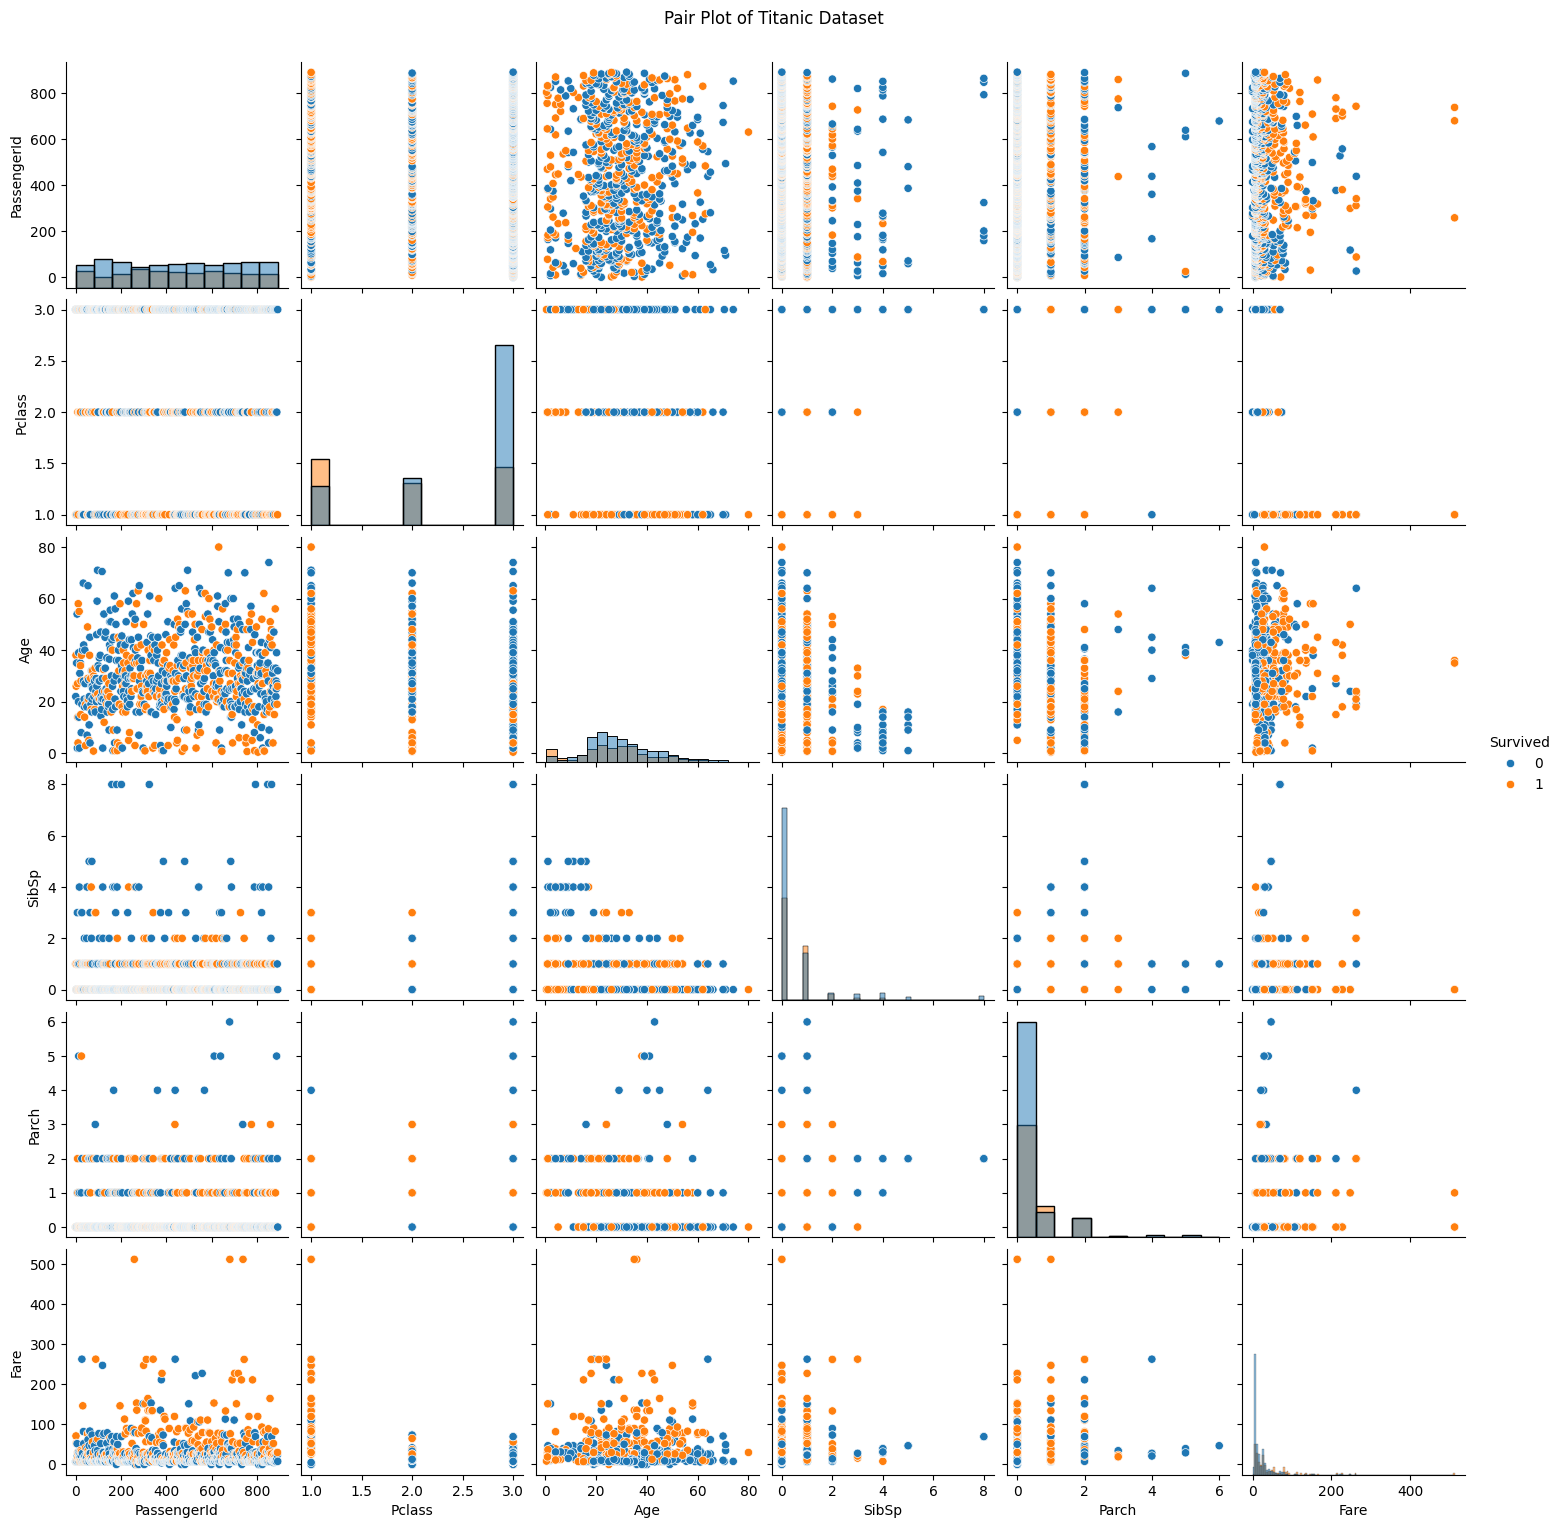

In [ ]:
# Pair plot showing scatterplots and histograms for numerical columns
sns.pairplot(train_data, hue='Survived', diag_kind='hist')
plt.suptitle('Pair Plot of Titanic Dataset', y=1.02)
plt.show()

**Data Preprocessing:**

In [ ]:
# Dropping Cabin columns, since 687 out of 891 is missing for train data and 327 out of 418 for test data. This wont provide any usefull information
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Handling missing values for Embarked, filling with mode since its only 2 rows missing
mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode_embarked, inplace=True)

In [ ]:
# Handling missing values for Age, fill with median age
median_age = train_data['Age'].median()
train_data['Age'].fillna(median_age, inplace=True)


median_age2 = test_data['Age'].median()
test_data['Age'].fillna(median_age2, inplace=True)

In [ ]:
# Handling missing values for fare, fill with median fare
median_fare = test_data['Fare'].median()
test_data['Fare'].fillna(median_fare, inplace=True)

In [ ]:
# Null check
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Null check
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Sex count
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
# Convert 'Sex' column to numerical
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# One-hot encode 'Embarked' column

# Label encode the 'Embarked' column
label_encoder = LabelEncoder()
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

In [ ]:
# Convert 'Sex' column to numerical
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [ ]:
# Label encode the 'Embarked' column
label_encoder = LabelEncoder()
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

In [ ]:

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2


In [ ]:
# Drop columns that are not useful for the model
New_train = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
New_test = test_data.drop(['Name', 'Ticket'], axis=1)

**Model Building:**

In [ ]:
# Split the data into features (X) and target (y)
X = New_train.drop('Survived', axis=1)
y = New_train['Survived']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression Model

In [ ]:
#Initialize the logistic regression model
Lg_model = LogisticRegression()

#Define the hyperparameters grid
#LG
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(Lg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.81


In [ ]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the LG model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7877094972067039
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.78      0.68      0.72        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



Support Vector Machine

In [ ]:

#initiate Support Vector Machine model
svm_model = SVC(random_state=42)

# Define the hyperparameters grid

#SVM
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.82


In [ ]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



Random Forest

In [ ]:
#Initialize the Random Forest classifier
rsf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Define the hyperparameters grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(rsf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.2f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.82


In [ ]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=50,
                       random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the RFC model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8491620111731844
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [ ]:
New_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,1
1,893,3,1,47.0,1,0,7.0000,2
2,894,2,0,62.0,0,0,9.6875,1
3,895,3,0,27.0,0,0,8.6625,2
4,896,3,1,22.0,1,1,12.2875,2


In [ ]:
# Keep the PassengerId column separately
passenger_ids = New_test['PassengerId']

In [ ]:
# Standardize the new data
New_test = scaler.transform(New_test.drop(['PassengerId'], axis=1))

In [ ]:

# Predict survival on the new data
new_predictions = best_model.predict(New_test)

In [ ]:
# Create a new DataFrame with 'PassengerId' and the predicted 'Survived' status
results = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': new_predictions
})

In [ ]:
# Save the results to a CSV file
results.to_csv('results.csv', index=False)

In [ ]:
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Reading in my datasets

Answers = pd.read_csv('gender_submission.csv')

In [ ]:
Answers.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Find rows in results that are not in Answers
difference_R_A = results[~results.isin(Answers)].dropna()

In [ ]:
# Print the differences
print("rows in results that are not in Answers:")
print(difference_R_A)

rows in results that are not in Answers:
Empty DataFrame
Columns: [PassengerId, Survived]
Index: []


In [ ]:
# Find rows in Answers that are not in results
Difference_A_R = Answers[~Answers.isin(results)].dropna()

In [ ]:
print("\nrows in Answers that are not in results:")
print(Difference_A_R)


rows in Answers that are not in results:
Empty DataFrame
Columns: [PassengerId, Survived]
Index: []
